In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math


In [2]:
def get(file):

	data = None
	with open(file, "r") as f:
		data = f.readlines()

	x, y = np.array([], dtype='f'), np.array([], dtype='f')
	for d in data:
		d = np.array(d.split(' '), dtype='f')
		x = np.append(x, d[0])
		y = np.append(y, d[1])

	return x, y



def linreg(x, y):

	X = np.array([x]).T
	one = np.ones((X.shape[0], 1)) # create a single-column matrix
	                               # where every element is 1
	Xbar = np.concatenate((one, X), axis=1) # Xbar = [1 X]
	A = np.dot(Xbar.T, Xbar) # A = Xbar.T * Xbar
	b = np.dot(Xbar.T, y[:7]) # b = Xbar.T * y
	Ainv = np.linalg.pinv(A) # pseudo inversion of A
	w = np.dot(Ainv, b)

	def f(x):
		return x * w[1] + w[0]

	return f


`data.csv`

| Height | Weight |
|--------|--------|
| 147 | 49 |
| 150 | 50 |
| 153 | 51 |
| 158 | 54 |
| 163 | 58 |
| 165 | 59 |
| 168 | 60 |
| 170 | 62 |
| 173 | 63 |
| 175 | 64 |
| 178 | 66 |
| 180 | 67 |
| 183 | 68 |


In [3]:
x, y = get("data.csv")
f = linreg(x[:6], y[:6])

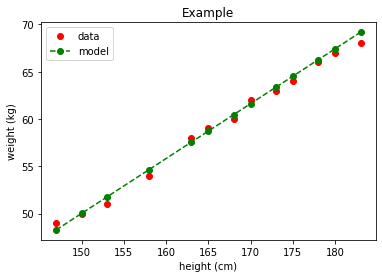

In [8]:
plt.plot(x, y, "ro", label="data")
plt.plot(x, f(x), "go--", label="model")
plt.title("Example")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")
plt.legend() # show label
plt.show()

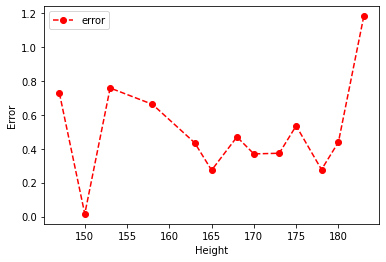

In [5]:
n = len(x)
plt.plot(x, [abs(y[i] - f(x[i])) for i in range(n)], "ro--", label="error")
plt.xlabel("Height")
plt.ylabel("Error")
plt.legend()
plt.show()